In [49]:
# Initial setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from image_loader import load_image
from edge_detection import detect_edge
import os.path as pth

# Begin plotting in pop out window
%matplotlib qt

In [50]:
# Find nearest array value
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

In [51]:
# Mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    
    print('x = %d, y = %d' % (ix, iy))

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return

In [52]:
# Generate some example data
#x, y = np.mgrid[-5:5:0.1, -5:5:0.1]
#z = np.sqrt(x**2 + y**2) + np.sin(x**2 + y**2)

# Example edge binary image
test_file = pth.join('.', 'tests', 'test_data', '10_circles_colour.gif')
image_in = load_image(test_file)
z = detect_edge(image_in)

In [53]:
# Plot this image inline
fig = plt.figure()
axes = fig.add_subplot(111)
axes.imshow(z)
axes.axis('image')
axes.set_title('Binary edges image')

plt.show()

In [54]:
# Call click function to select profile:
coords = [] # initialise array to store picked coords

print("Picked coordinates:")

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Picked coordinates:
x = 25, y = 225
x = 198, y = 94

In [55]:
# Extract the profile as nearest-neighbour pixel values
x0 = coords[0][0]
x1 = coords[1][0]
y0 = coords[0][1]
y1 = coords[1][1]

length = int(np.hypot(x1-x0, y1-y0))
x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)
profile = z[x.astype(np.int), y.astype(np.int)]

In [56]:
# Switch to plotting inline
%matplotlib inline

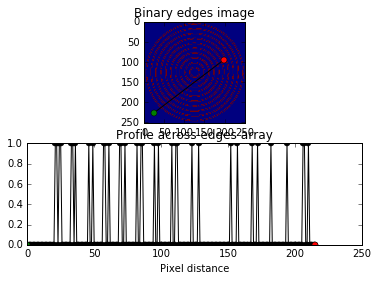

In [57]:
# Plot to show where the profile is and the profile values
fig, axes = plt.subplots(nrows=2)
axes[0].imshow(z)
axes[0].plot([x0, x1], [y0, y1], 'k-')
axes[0].plot(x0, y0, 'go')
axes[0].plot(x1, y1, 'ro')
axes[0].axis('image')
axes[0].set_title('Binary edges image')

axes[1].plot(profile,'ko-')
axes[1].plot(0,profile[0],'go')
axes[1].plot(len(profile)-1,profile[-1],'ro')
axes[1].set_title('Profile across edges array')
axes[1].set_xlabel('Pixel distance')